##                                           BREAST CANCER CLASSIFICATION

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous).

Diagnosis is the dependent variable.


Objective:

Understand the Dataset & cleanup (if required).

Build classification models to predict whether the cancer type is Malignant or Benign.

## Read the Data

In [1]:
import pandas as pd

df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## EDA

In [2]:
df.shape

(569, 32)

In [3]:
#ID column has no real signficance when predicting breast cancer, so lets drop it
df.drop(columns = ["id"], inplace = True, axis = 1)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


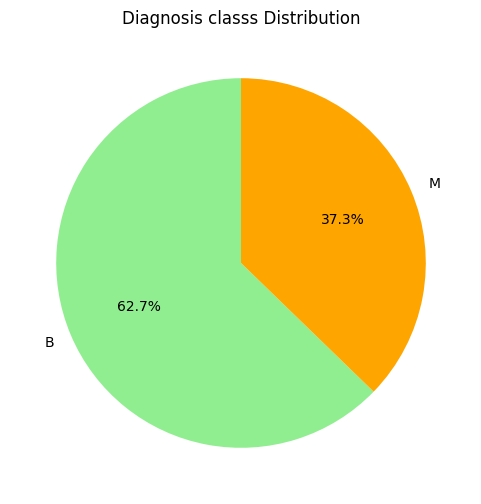

In [6]:
#Check for class imbalance
import matplotlib.pyplot as plt

# Count occurrences of each diagnosis
diagnosis_counts = df["diagnosis"].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
plt.title("Diagnosis classs Distribution")
plt.show()

In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
# Column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
#No null values were found and only one categorical variable i.e., diagnosis

In [10]:
print(df.duplicated().sum()) #to check duplicate

0


In [11]:
#Lets convert the categorical variable into numeric by encoding
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
features = df.drop(columns=['diagnosis'], axis = 1)

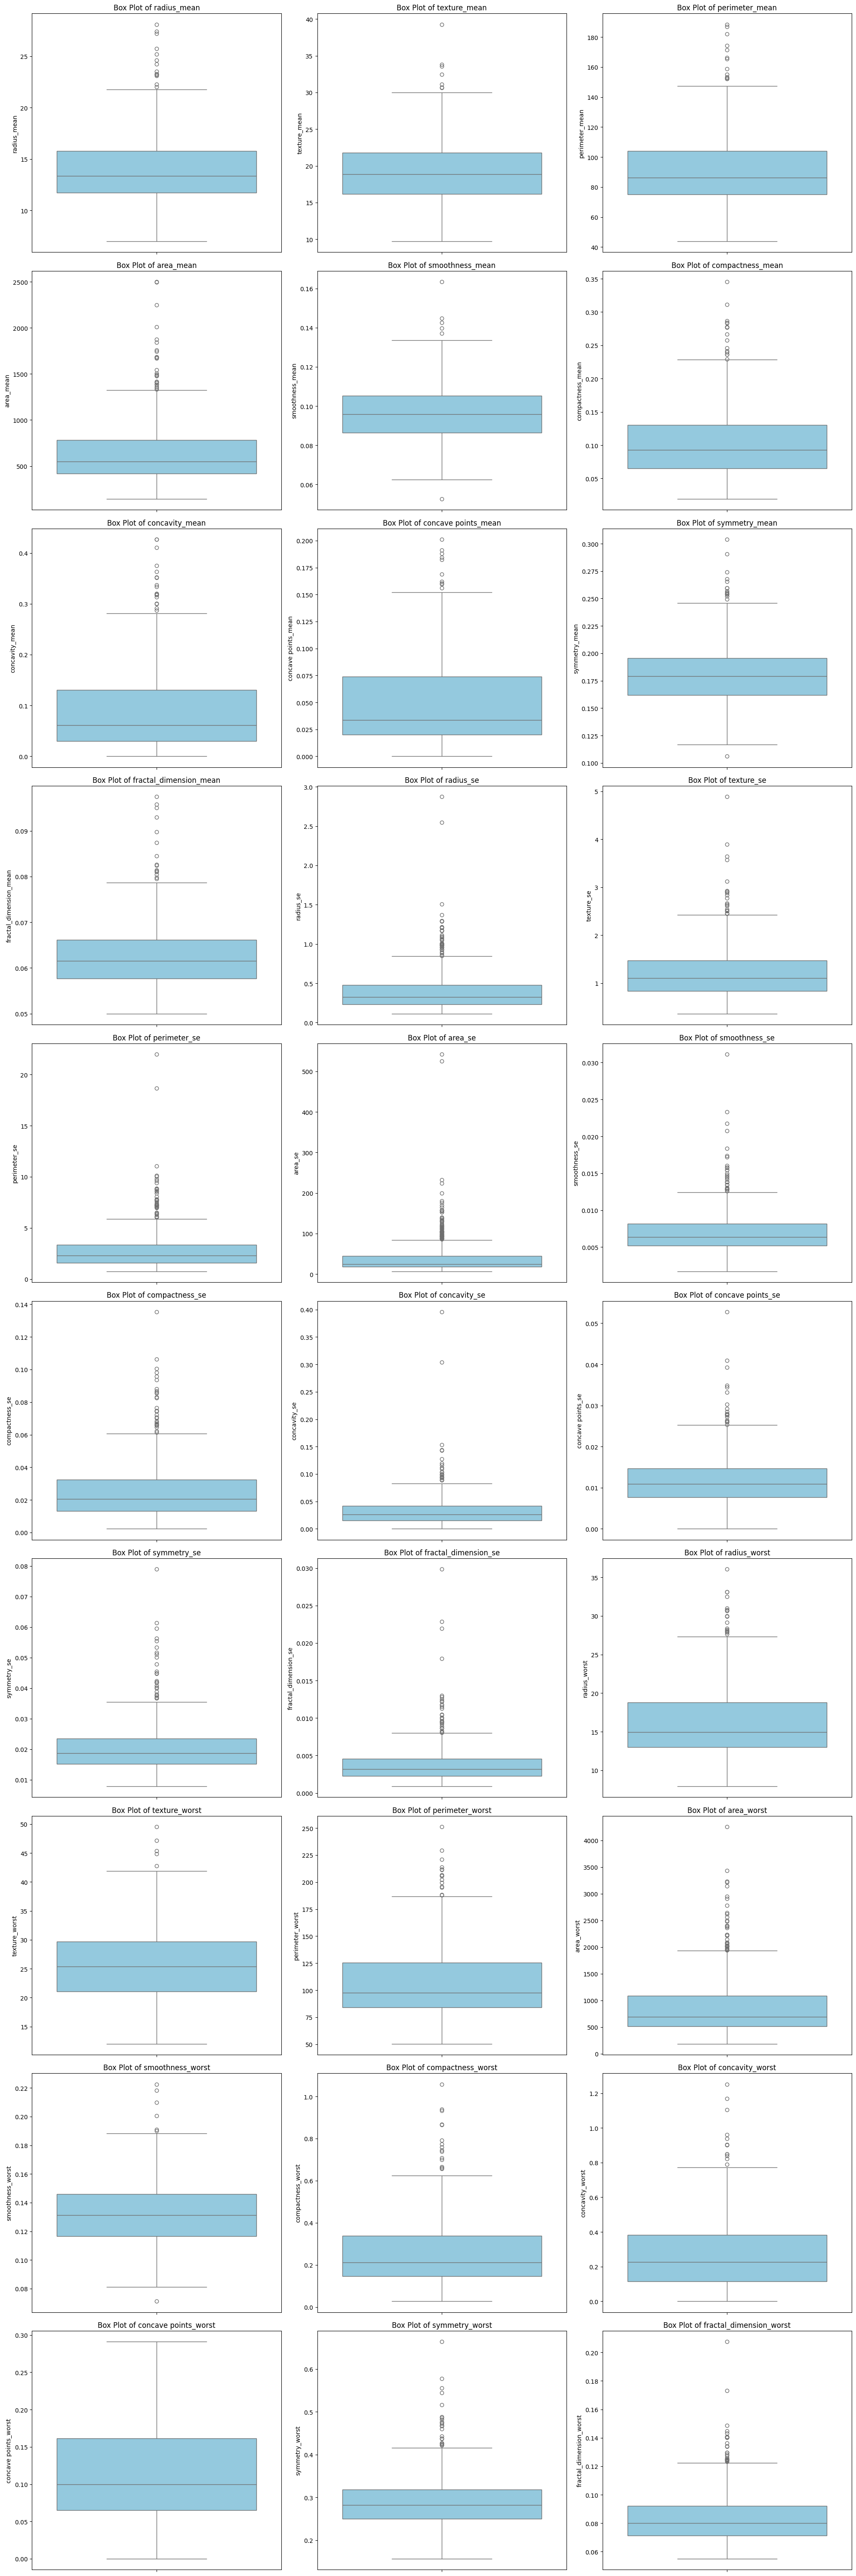

In [15]:
import seaborn as sns
plt.figure(figsize=(20, 60))  # Adjust figure size to accommodate all plots
for i, feature in enumerate(features, 1):
    plt.subplot(10, 3, i)  # 10 rows, 3 columns for subplots
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f"Box Plot of {feature}")
    plt.tight_layout()

plt.show()

In [16]:
# Function to detect outliers
def detect_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

outliers_radius_mean = detect_outliers('radius_mean')
print("Outliers in 'radius_mean':")
print(outliers_radius_mean.shape)

Outliers in 'radius_mean':
(14, 31)


In [17]:
#Outliers can be detected using the above function but without proper domain knowledge, it's better to ignore all the outliers

## Feature Engineering

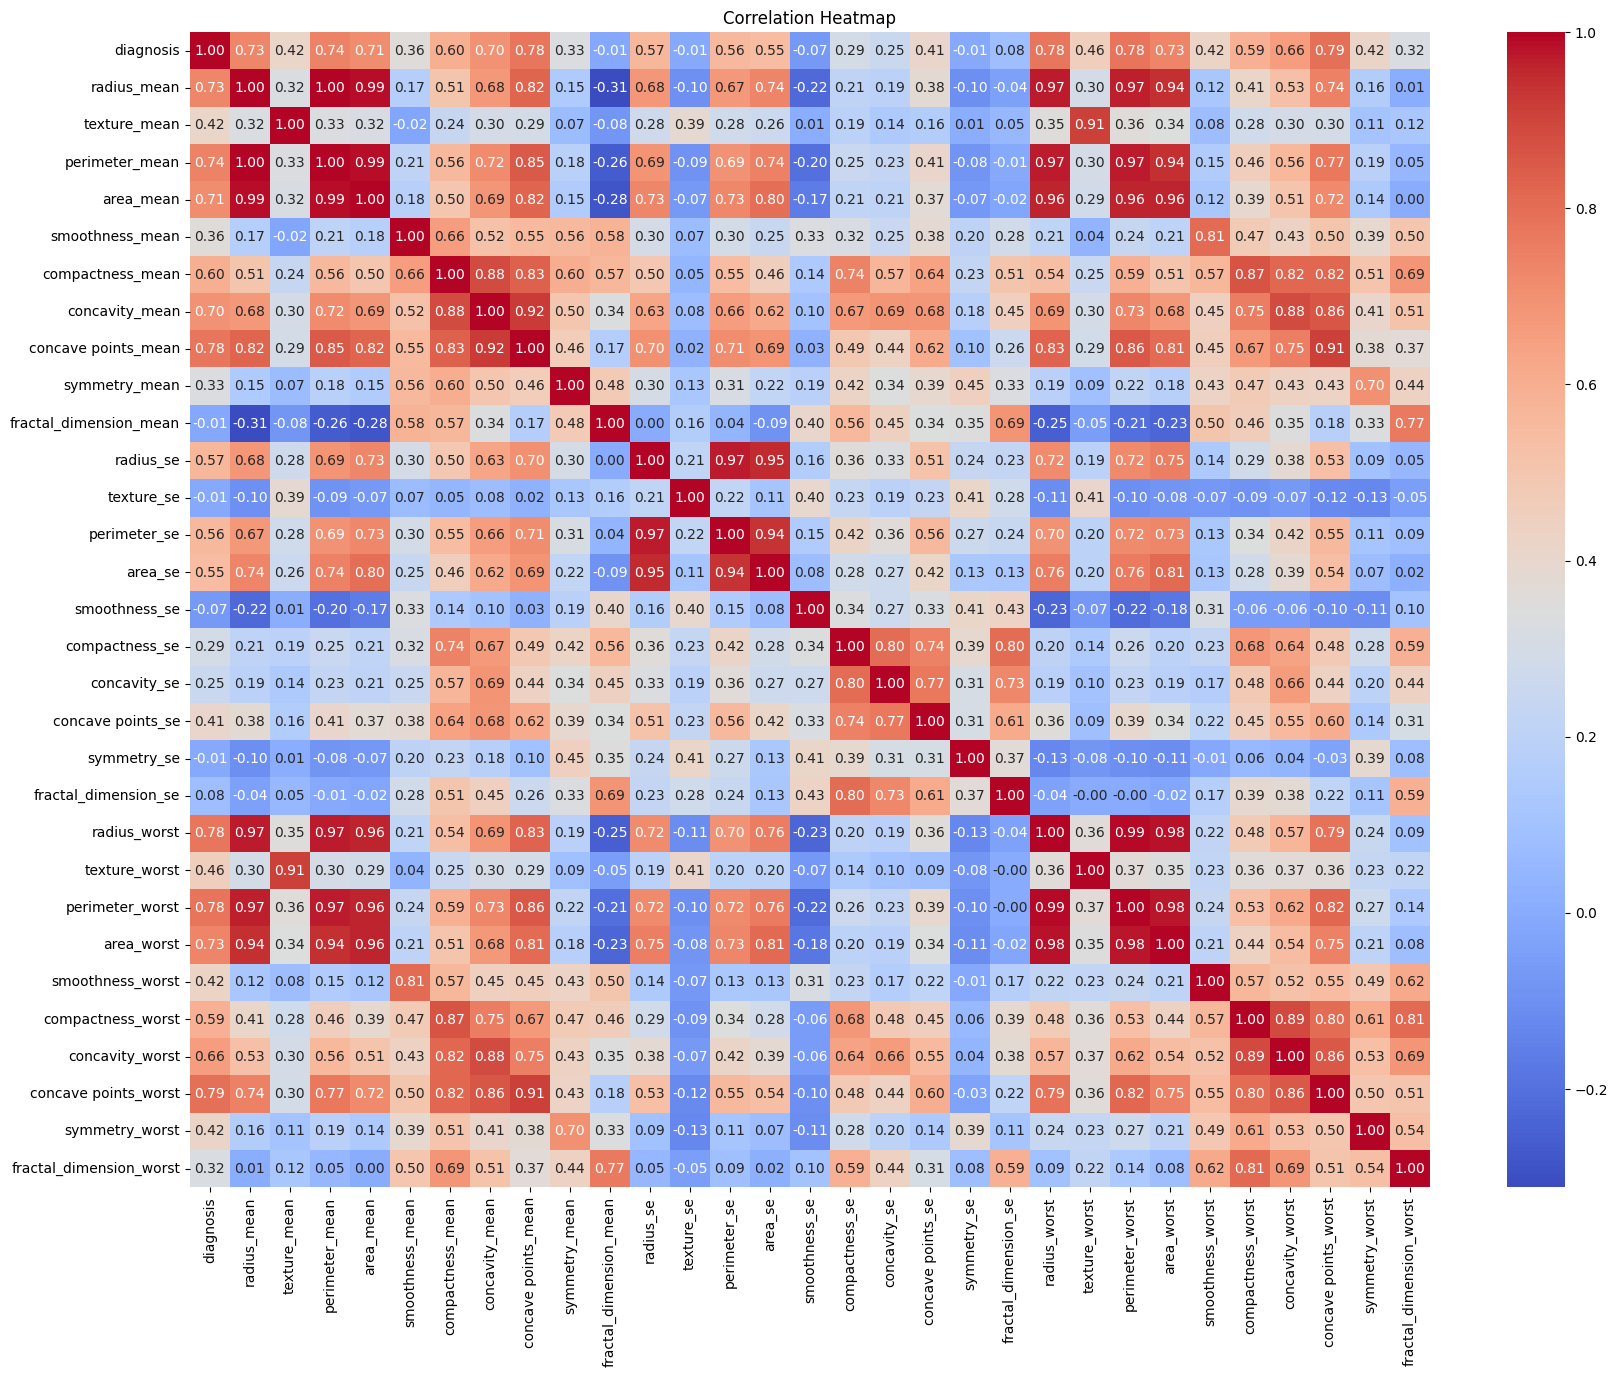

In [18]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
#Lets find the highly correlated features to train our model
corr_target = abs(corr_matrix["diagnosis"])
corr_target

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean     0.012838
radius_se                  0.567134
texture_se                 0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se              0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se                0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

The below commented out code can be used to remove highly correlated features to each other based on our requirement

In [20]:
# # Set a correlation threshold
# threshold = 0.8

# # Find pairs of features with correlation above the threshold
# high_corr_pairs = []
# for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#         if abs(corr_matrix.iloc[i, j]) > threshold:
#             high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# # Print highly correlated feature pairs
# for pair in high_corr_pairs:
#     print(f"Highly correlated: {pair[0]} and {pair[1]} (Correlation = {pair[2]:.2f})")

# # Create a set to store features to remove
# features_to_remove = set()

# # Iterate through highly correlated pairs and mark one feature for removal
# for pair in high_corr_pairs:
#     feature1, feature2, corr_value = pair
#     if feature1 not in features_to_remove:
#         features_to_remove.add(feature2)

# # Drop the correlated features
# df_reduced = df.drop(columns=features_to_remove)
# print("Features removed:", features_to_remove)
# print("Reduced dataset shape:", df_reduced.shape)

In [21]:
# Selecting highly correlated features by setting up the threshold = 0.3
df_corr_features = corr_target[corr_target > 0.2]

# Collect the names of the features
names = [index for index, value in df_corr_features.items()]

# Dropping the target variable from names
if 'diagnosis' in names:
    names.remove('diagnosis')

print("Highly correlated features with the target variable:", names)

Highly correlated features with the target variable: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [22]:
X = df[names]
y = df["diagnosis"]

In [23]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 36)

#Scale the data using standard scaler
scaler = StandardScaler() #creates an instance of Standard Scaler
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[-1.41522895, -1.28706944, -1.35861131, ..., -0.97605995,
         0.59088132,  0.0219556 ],
       [-1.58724636, -1.46105485, -1.55232902, ..., -0.45658037,
         0.12283522,  1.07556516],
       [ 0.26122644, -0.62775628,  0.28114481, ..., -0.20359003,
        -1.13885426,  0.05303708],
       ...,
       [ 1.81281204,  0.27193146,  1.77322747, ...,  0.69886355,
         0.49382828, -1.08644165],
       [-0.02165933,  1.75538605, -0.02374281, ..., -0.15808816,
        -1.02458213, -0.06707441],
       [-0.88174638, -0.60715275, -0.87245038, ..., -0.62053874,
         0.1463158 , -0.29886851]])

# Model Evaluation

In [25]:
#Lets define a function to iterate faster

def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train) #fits the model instance
    y_pred = model.predict(X_test)

    #Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    #lets create a dataframe to visualize the results
    evaluation_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1', 'precision', 'recall', 'balanced_accuracy'])
    return evaluation_df

## Logistic Regression

In [26]:
lg = LogisticRegression(solver='liblinear', max_iter=1000)
results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)
results.index = ['Logistic_Regression']
results

,accuracy,f1,precision,recall,balanced_accuracy
Logistic_Regression,0.947368,0.916667,1.0,0.846154,0.923077


In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree, X_train, y_train, X_test, y_test)
decision_tree_results.index = ["Decision_Tree"]
results = pd.concat([results, decision_tree_results])
results

,accuracy,f1,precision,recall,balanced_accuracy
Logistic_Regression,0.947368,0.916667,1.000000,0.846154,0.923077
Decision_Tree,0.956140,0.938272,0.904762,0.974359,0.960513


## KNearestNeighbors

In [28]:
KNN = KNeighborsClassifier(n_neighbors = 12)
KNN_results = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
KNN_results.index = ["KNearestNeighbors"]
results = pd.concat([results, KNN_results])
results

,accuracy,f1,precision,recall,balanced_accuracy
Logistic_Regression,0.947368,0.916667,1.000000,0.846154,0.923077
Decision_Tree,0.956140,0.938272,0.904762,0.974359,0.960513
KNearestNeighbors,0.947368,0.918919,0.971429,0.871795,0.929231


In [29]:
results.sort_values(by='f1',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1,precision,recall,balanced_accuracy
Decision_Tree,0.956140,0.938272,0.904762,0.974359,0.960513
KNearestNeighbors,0.947368,0.918919,0.971429,0.871795,0.929231
Logistic_Regression,0.947368,0.916667,1.000000,0.846154,0.923077


## Naive Bayes 

In [30]:
Naive_Bayes = GaussianNB()
Naive_Bayes_results = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
Naive_Bayes_results.index = ['Naive_Bayes']

results = pd.concat([results, Naive_Bayes_results])
results

,accuracy,f1,precision,recall,balanced_accuracy
Logistic_Regression,0.947368,0.916667,1.000000,0.846154,0.923077
Decision_Tree,0.956140,0.938272,0.904762,0.974359,0.960513
KNearestNeighbors,0.947368,0.918919,0.971429,0.871795,0.929231
Naive_Bayes,0.956140,0.931507,1.000000,0.871795,0.935897


## Random Forest Classifier

In [31]:
rf = RandomForestClassifier()
rf_results = train_evaluate_model(rf, X_train, y_train, X_test, y_test)
rf_results.index = ['Random_Forest']

results = pd.concat([results, rf_results])
results

,accuracy,f1,precision,recall,balanced_accuracy
Logistic_Regression,0.947368,0.916667,1.000000,0.846154,0.923077
Decision_Tree,0.956140,0.938272,0.904762,0.974359,0.960513
KNearestNeighbors,0.947368,0.918919,0.971429,0.871795,0.929231
Naive_Bayes,0.956140,0.931507,1.000000,0.871795,0.935897
Random_Forest,0.973684,0.961039,0.973684,0.948718,0.967692


## XGBoost

In [32]:
xgboost = xgb.XGBClassifier()
xgboost_results = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xgboost_results.index = ['XGBoost']
results = pd.concat([results, xgboost_results])
results

,accuracy,f1,precision,recall,balanced_accuracy
Logistic_Regression,0.947368,0.916667,1.000000,0.846154,0.923077
Decision_Tree,0.956140,0.938272,0.904762,0.974359,0.960513
KNearestNeighbors,0.947368,0.918919,0.971429,0.871795,0.929231
Naive_Bayes,0.956140,0.931507,1.000000,0.871795,0.935897
Random_Forest,0.973684,0.961039,0.973684,0.948718,0.967692
XGBoost,0.982456,0.973684,1.000000,0.948718,0.974359


## SVM

In [40]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', probability = True, random_state = 36)
svm_results = train_evaluate_model(svm, X_train, y_train, X_test, y_test)
svm_results.index = ['SVM']
results = pd.concat([results, svm_results])
results

,accuracy,f1,precision,recall,balanced_accuracy
Logistic_Regression,0.947368,0.916667,1.000000,0.846154,0.923077
Decision_Tree,0.956140,0.938272,0.904762,0.974359,0.960513
KNearestNeighbors,0.947368,0.918919,0.971429,0.871795,0.929231
Naive_Bayes,0.956140,0.931507,1.000000,0.871795,0.935897
Random_Forest,0.973684,0.961039,0.973684,0.948718,0.967692
XGBoost,0.982456,0.973684,1.000000,0.948718,0.974359
SVM,0.929825,0.885714,1.000000,0.794872,0.897436


In [41]:
# Sort the dataframe based on the 'f1' column in descending order
results_sorted = results.sort_values(by="f1", ascending=False)

# Display the sorted dataframe
results_sorted


,accuracy,f1,precision,recall,balanced_accuracy
XGBoost,0.982456,0.973684,1.000000,0.948718,0.974359
Random_Forest,0.973684,0.961039,0.973684,0.948718,0.967692
Decision_Tree,0.956140,0.938272,0.904762,0.974359,0.960513
Naive_Bayes,0.956140,0.931507,1.000000,0.871795,0.935897
KNearestNeighbors,0.947368,0.918919,0.971429,0.871795,0.929231
Logistic_Regression,0.947368,0.916667,1.000000,0.846154,0.923077
SVM,0.929825,0.885714,1.000000,0.794872,0.897436


In [42]:
# Find the model with the best performance for each metric
best_models = results.idxmax()

# Display the best models for each metric
best_models

accuracy                         XGBoost
f1                               XGBoost
precision            Logistic_Regression
recall                     Decision_Tree
balanced_accuracy                XGBoost
dtype: object

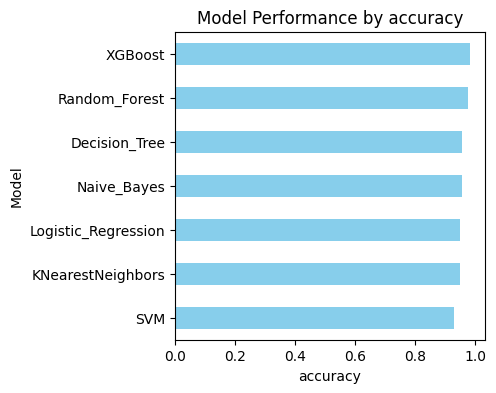

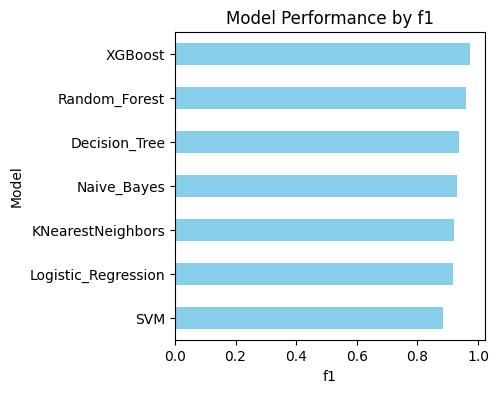

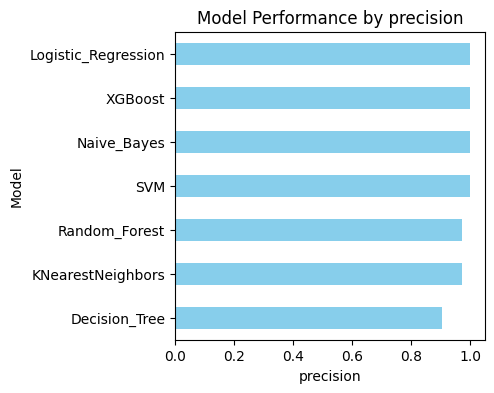

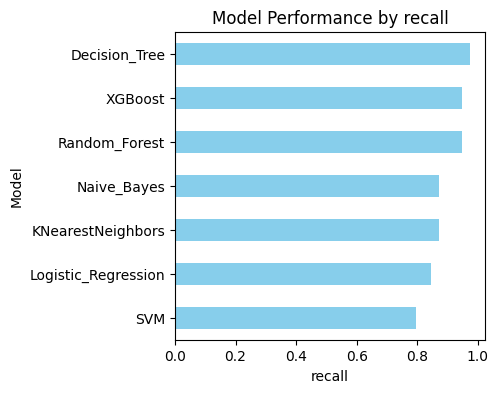

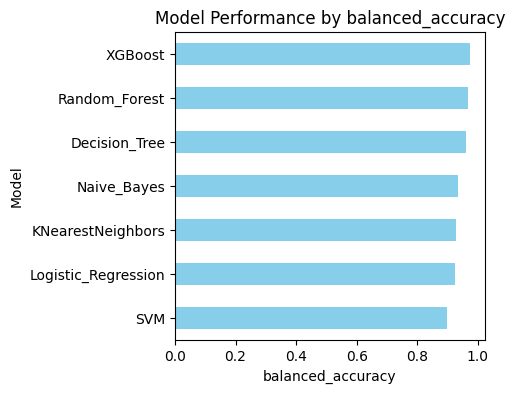

In [43]:
# Plot each metric separately
for metric in results_sorted.columns:
    results.sort_values(by=metric, ascending=False).plot(kind='barh', y=metric, figsize=(4, 4), legend=False, color='skyblue')
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.title(f"Model Performance by {metric}")
    plt.gca().invert_yaxis()  # Best model appears at the top
    plt.show()
